<a href="https://colab.research.google.com/github/Levelearn/data-analysis/blob/main/validity_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'
data = pd.read_csv(file_path, encoding='latin-1', sep=';')

print(data.head().to_string())

            Timestamp                          Email                     Nama       NIM  Angkatan  Happiness_Q1  Happiness_Q2  Happiness_Q3  Happiness_Q4  Happiness_Q5  Engagement_Q1  Engagement_Q2  Engagement_Q3  Engagement_Q4  Engagement_Q5  Adoption_Q1  Adoption_Q2  Adoption_Q3  Adoption_Q4  Adoption_Q5  Retention_Q1  Retention_Q2  Retention_Q3  Retention_Q4  Retention_Q5  TaskSuccess_Q1  TaskSuccess_Q2  TaskSuccess_Q3  TaskSuccess_Q4  TaskSuccess_Q5                                                              Qualitative_Q1 Qualitative_Q2        Qualitative_Q3                                 Qualitative_Q4                                                 Feedback                                                                     Error                      Suggestion                                                                File
0   3/26/2025 9:50:09     rafaelmanurung80@gmail.com    Rafael A. C. Manurung  11S21028      2021             5             5             5            

In [ ]:
data_likert = data[['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5',
                  'Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5',
                  'Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5',
                  'Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5',
                  'TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5',
                  ]]

In [ ]:
happiness_cols = ['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5']
engagement_cols = ['Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5']
adoption_cols = ['Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5']
retention_cols = ['Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5']
task_success_cols = ['TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']

data['Happiness_Total'] = data[happiness_cols].sum(axis=1)
data['Engagement_Total'] = data[engagement_cols].sum(axis=1)
data['Adoption_Total'] = data[adoption_cols].sum(axis=1)
data['Retention_Total'] = data[retention_cols].sum(axis=1)
data['Task_Success_Total'] = data[task_success_cols].sum(axis=1)


**01. Validity Test** *(Spearman)*

In [ ]:
print("\nHasil Uji Validitas (Korelasi Spearman Item-Total yang Dikoreksi):")

# Uji validitas untuk aspek Happiness
print("\nAspek Happiness:")
for col in happiness_cols:
    # Hitung skor total Happiness tanpa item saat ini
    happiness_total_corrected = data[happiness_cols].drop(columns=[col]).sum(axis=1)
    correlation, p_value = spearmanr(data[col], happiness_total_corrected)
    print(f"Korelasi Spearman antara {col} dan Happiness_Total (dikoreksi): {correlation:.3f} (p-value: {p_value:.3f})")

# Uji validitas untuk aspek Engagement
print("\nAspek Engagement:")
for col in engagement_cols:
    engagement_total_corrected = data[engagement_cols].drop(columns=[col]).sum(axis=1)
    correlation, p_value = spearmanr(data[col], engagement_total_corrected)
    print(f"Korelasi Spearman antara {col} dan Engagement_Total (dikoreksi): {correlation:.3f} (p-value: {p_value:.3f})")

# Uji validitas untuk aspek Adoption
print("\nAspek Adoption:")
for col in adoption_cols:
    adoption_total_corrected = data[adoption_cols].drop(columns=[col]).sum(axis=1)
    correlation, p_value = spearmanr(data[col], adoption_total_corrected)
    print(f"Korelasi Spearman antara {col} dan Adoption_Total (dikoreksi): {correlation:.3f} (p-value: {p_value:.3f})")

# Uji validitas untuk aspek Retention
print("\nAspek Retention:")
for col in retention_cols:
    retention_total_corrected = data[retention_cols].drop(columns=[col]).sum(axis=1)
    correlation, p_value = spearmanr(data[col], retention_total_corrected)
    print(f"Korelasi Spearman antara {col} dan Retention_Total (dikoreksi): {correlation:.3f} (p-value: {p_value:.3f})")

# Uji validitas untuk aspek Task Success
print("\nAspek Task Success:")
for col in task_success_cols:
    task_success_total_corrected = data[task_success_cols].drop(columns=[col]).sum(axis=1)
    correlation, p_value = spearmanr(data[col], task_success_total_corrected)
    print(f"Korelasi Spearman antara {col} dan Task_Success_Total (dikoreksi): {correlation:.3f} (p-value: {p_value:.3f})")


Hasil Uji Validitas (Korelasi Spearman Item-Total yang Dikoreksi):

Aspek Happiness:
Korelasi Spearman antara Happiness_Q1 dan Happiness_Total (dikoreksi): 0.560 (p-value: 0.000)
Korelasi Spearman antara Happiness_Q2 dan Happiness_Total (dikoreksi): 0.645 (p-value: 0.000)
Korelasi Spearman antara Happiness_Q3 dan Happiness_Total (dikoreksi): 0.426 (p-value: 0.001)
Korelasi Spearman antara Happiness_Q4 dan Happiness_Total (dikoreksi): 0.627 (p-value: 0.000)
Korelasi Spearman antara Happiness_Q5 dan Happiness_Total (dikoreksi): 0.526 (p-value: 0.000)

Aspek Engagement:
Korelasi Spearman antara Engagement_Q1 dan Engagement_Total (dikoreksi): nan (p-value: nan)
Korelasi Spearman antara Engagement_Q2 dan Engagement_Total (dikoreksi): 0.556 (p-value: 0.000)
Korelasi Spearman antara Engagement_Q3 dan Engagement_Total (dikoreksi): 0.508 (p-value: 0.000)
Korelasi Spearman antara Engagement_Q4 dan Engagement_Total (dikoreksi): 0.564 (p-value: 0.000)
Korelasi Spearman antara Engagement_Q5 dan En


Visualisasi Data (Scatter Plot dengan Skor Total yang Dikoreksi):

Visualisasi untuk Aspek Happiness:


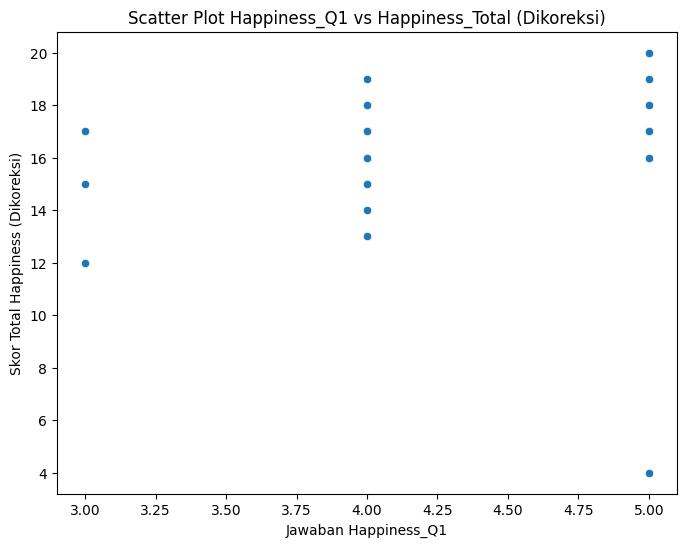

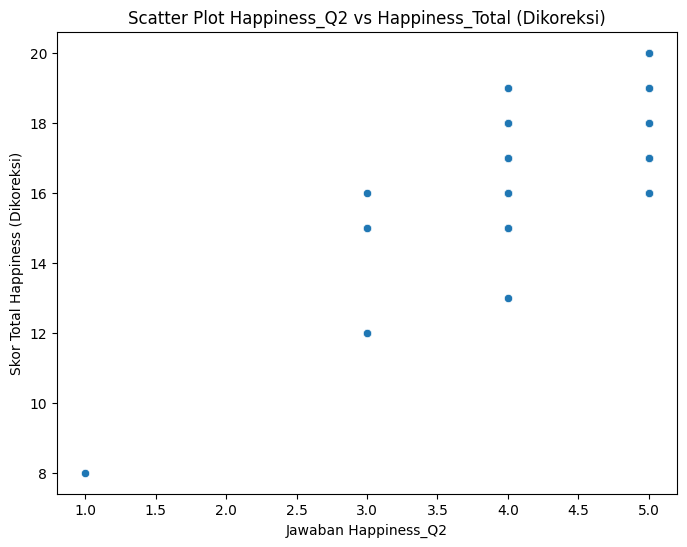

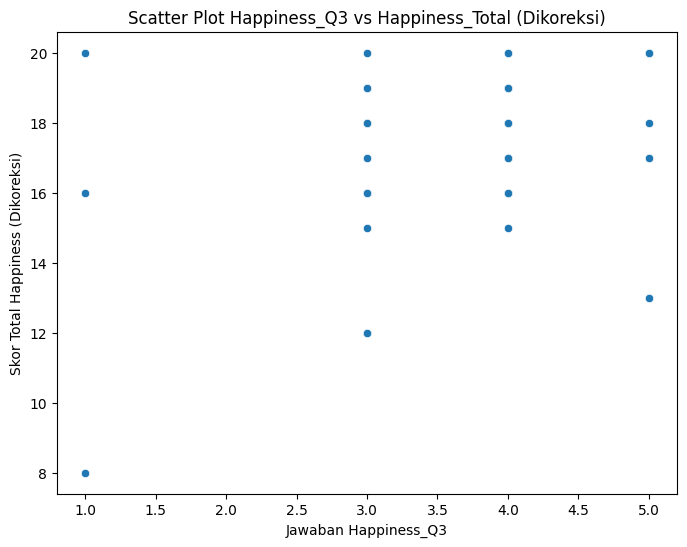

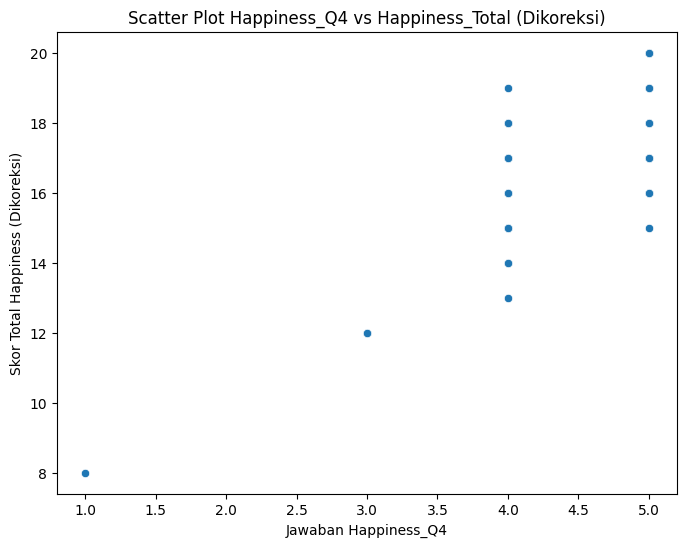

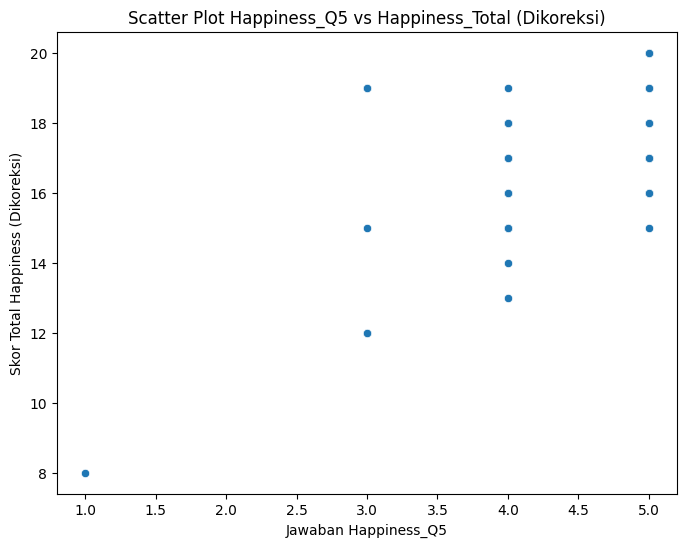


Visualisasi untuk Aspek Engagement:


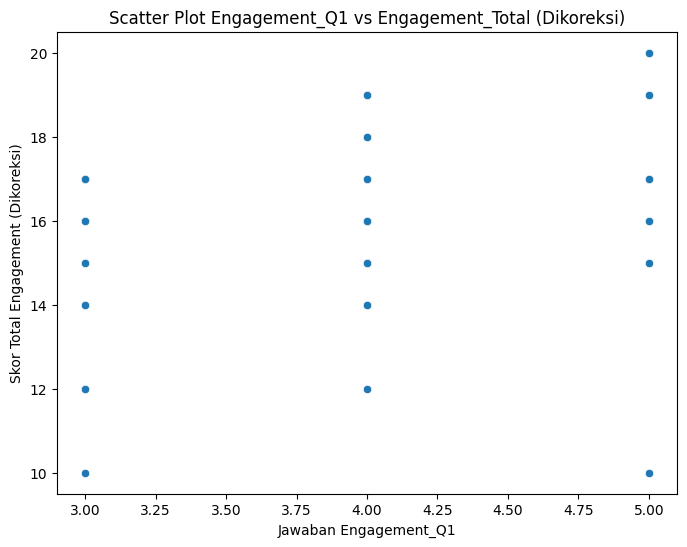

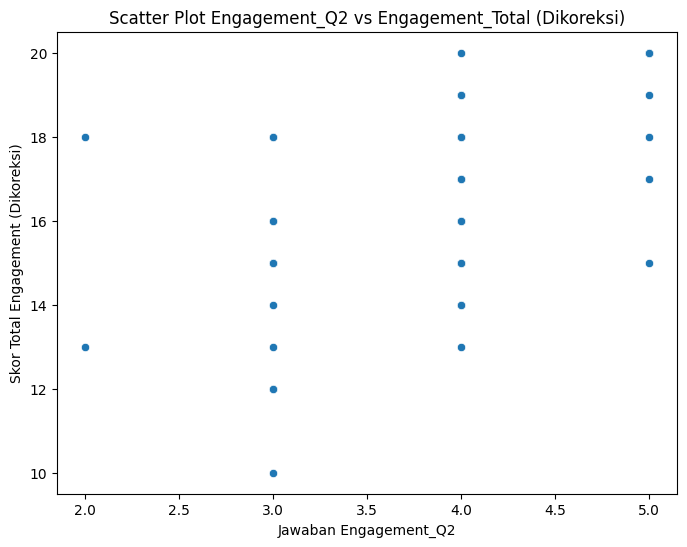

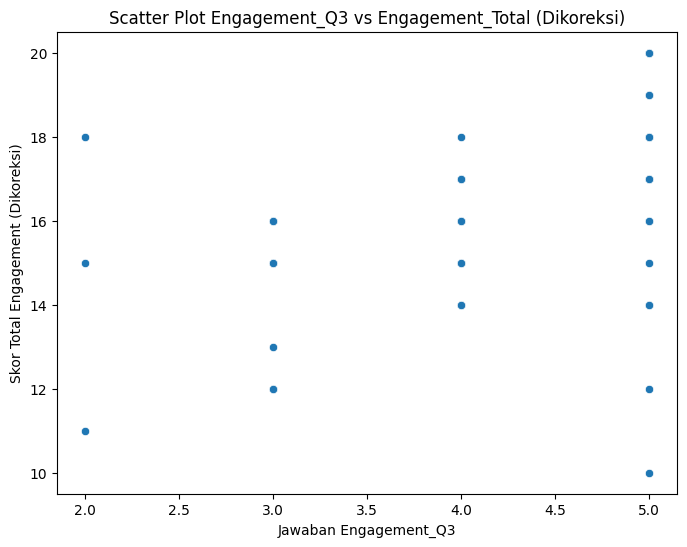

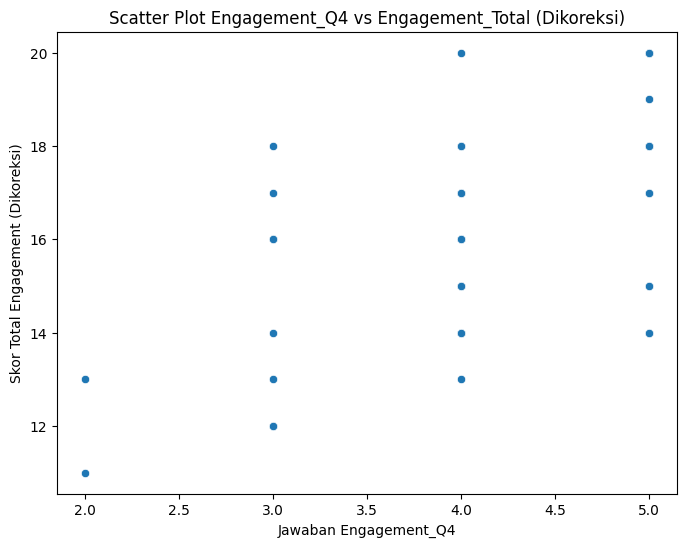

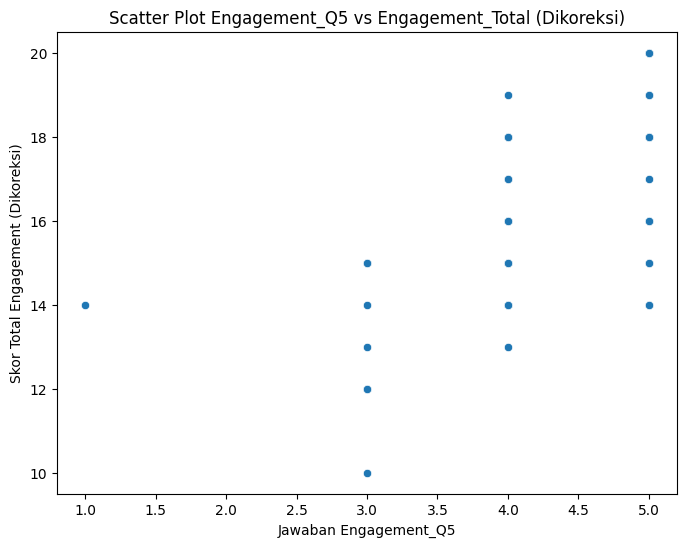


Visualisasi untuk Aspek Adoption:


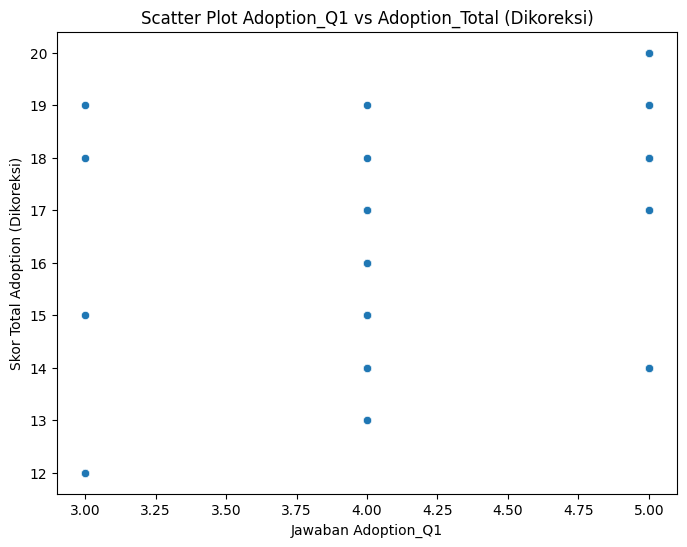

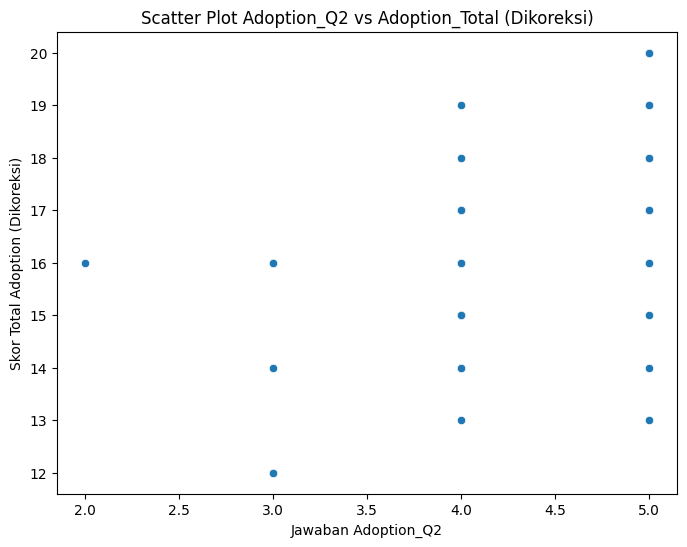

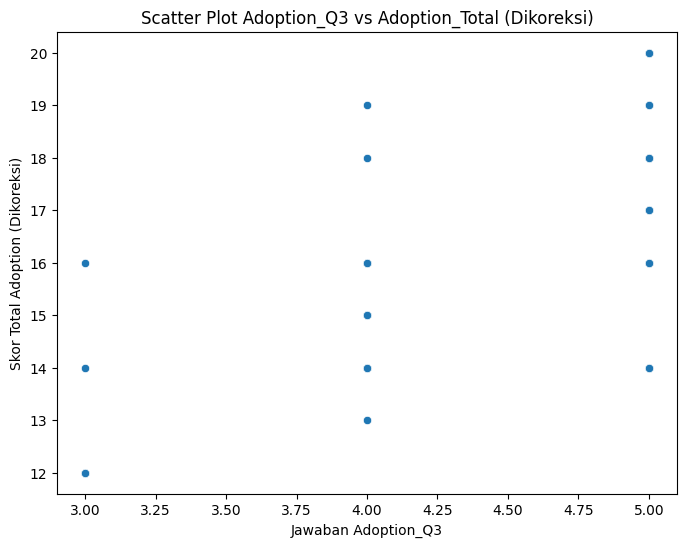

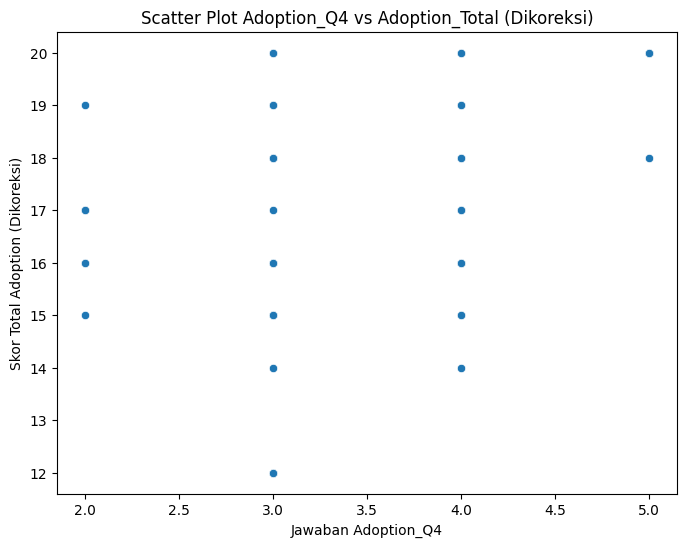

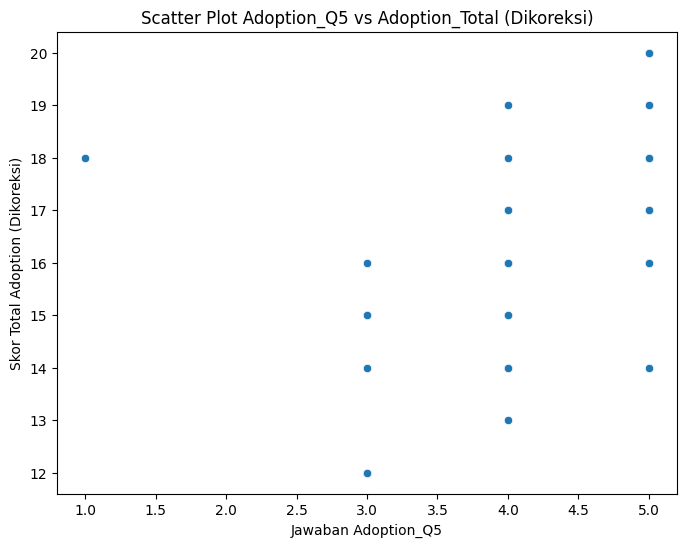


Visualisasi untuk Aspek Retention:


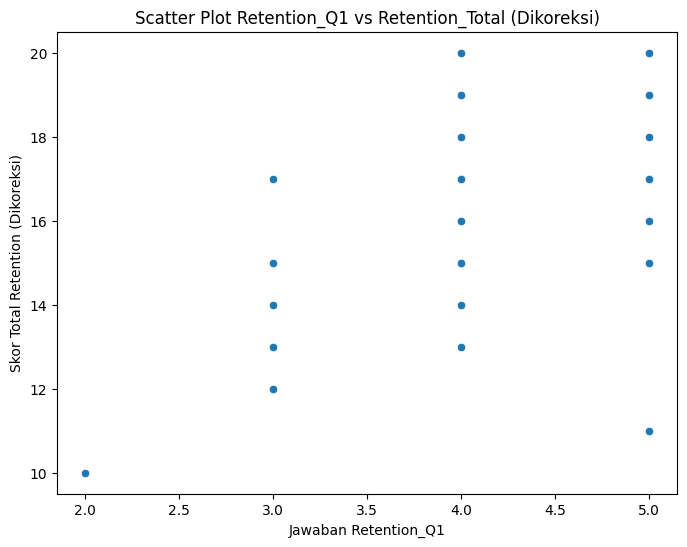

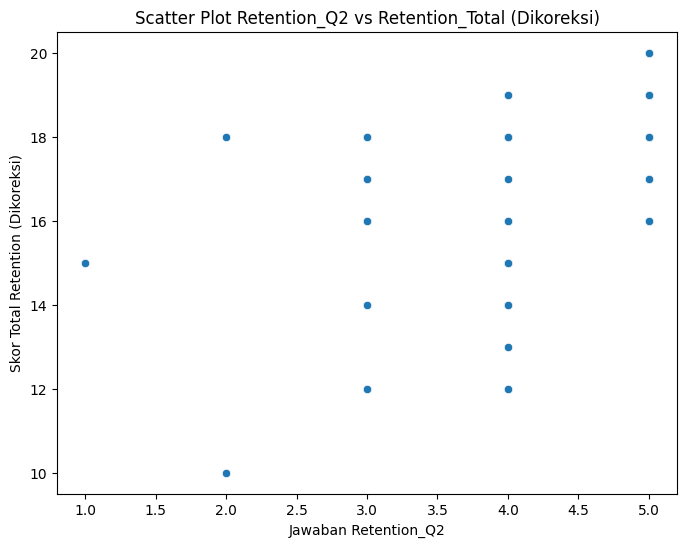

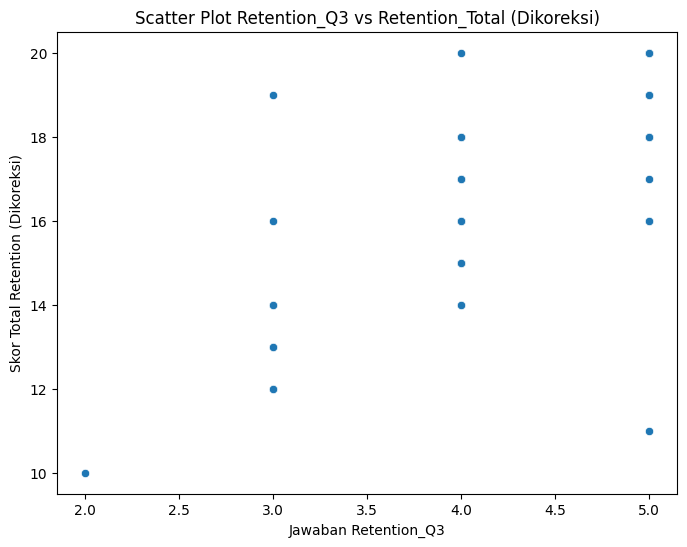

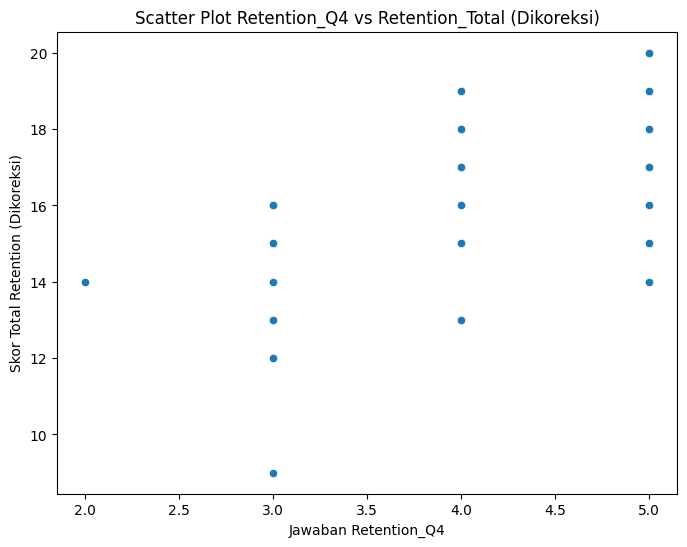

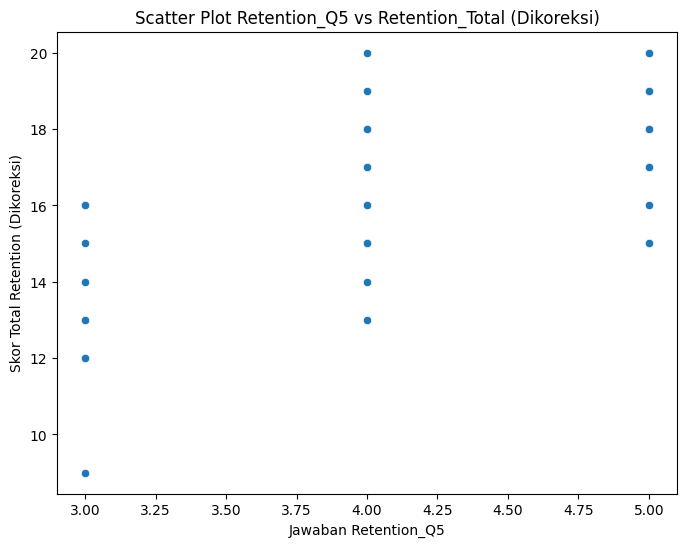


Visualisasi untuk Aspek Task Success:


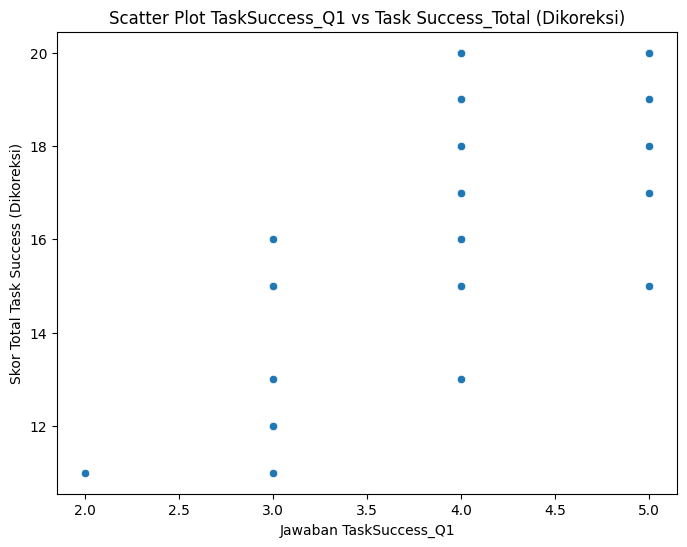

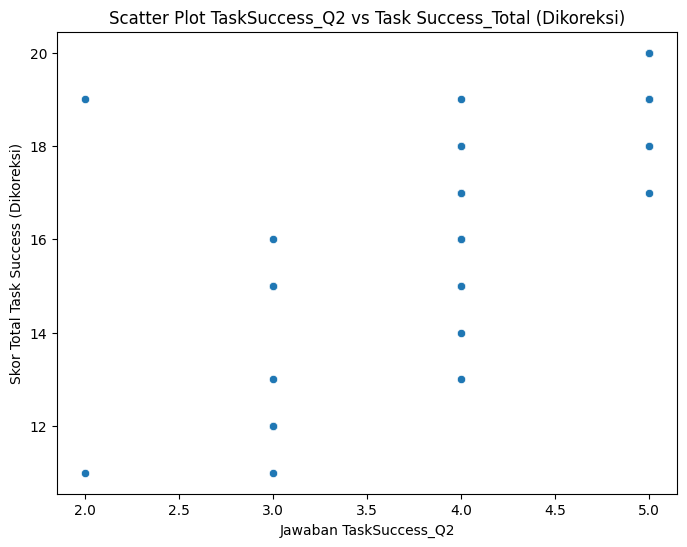

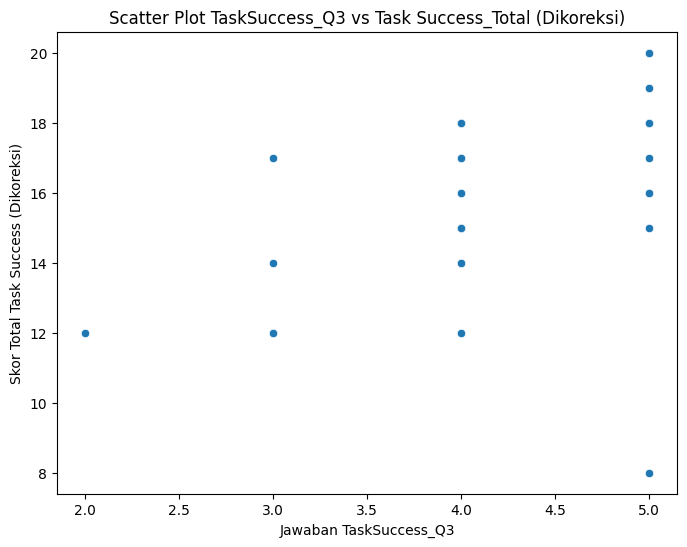

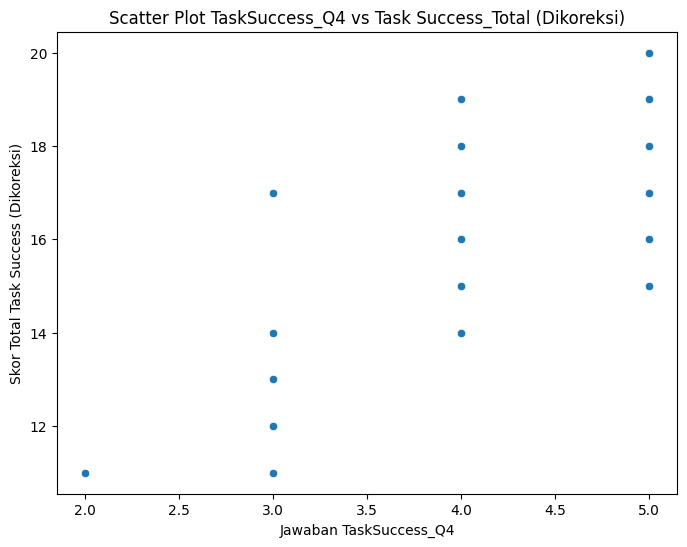

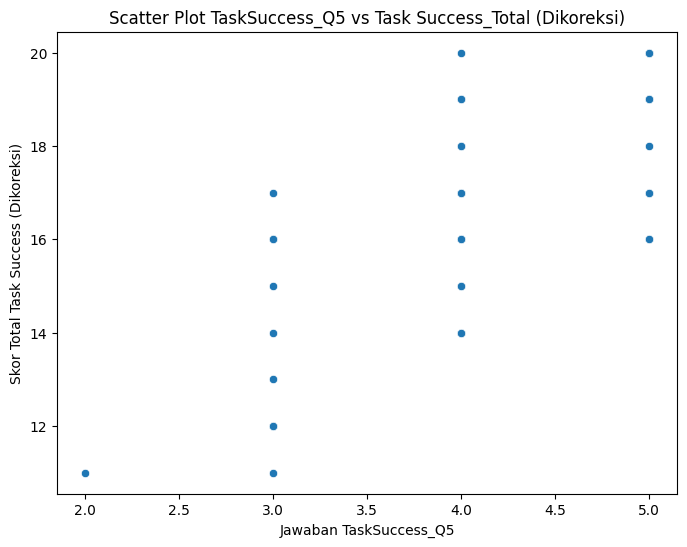

In [ ]:
# Visualisasi Data
print("\nVisualisasi Data (Scatter Plot dengan Skor Total yang Dikoreksi):")

for aspect, cols in zip(
    ['Happiness', 'Engagement', 'Adoption', 'Retention', 'Task Success'],
    [happiness_cols, engagement_cols, adoption_cols, retention_cols, task_success_cols]
):
    print(f"\nVisualisasi untuk Aspek {aspect}:")
    for col in cols:
        # Hitung skor total yang dikoreksi
        if aspect == 'Happiness':
            total_corrected = data[happiness_cols].drop(columns=[col]).sum(axis=1)
        elif aspect == 'Engagement':
            total_corrected = data[engagement_cols].drop(columns=[col]).sum(axis=1)
        elif aspect == 'Adoption':
            total_corrected = data[adoption_cols].drop(columns=[col]).sum(axis=1)
        elif aspect == 'Retention':
            total_corrected = data[retention_cols].drop(columns=[col]).sum(axis=1)
        elif aspect == 'Task Success':
            total_corrected = data[task_success_cols].drop(columns=[col]).sum(axis=1)

        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[col], y=total_corrected)
        plt.title(f'Scatter Plot {col} vs {aspect}_Total (Dikoreksi)')
        plt.xlabel(f'Jawaban {col}')
        plt.ylabel(f'Skor Total {aspect} (Dikoreksi)')
        plt.show()

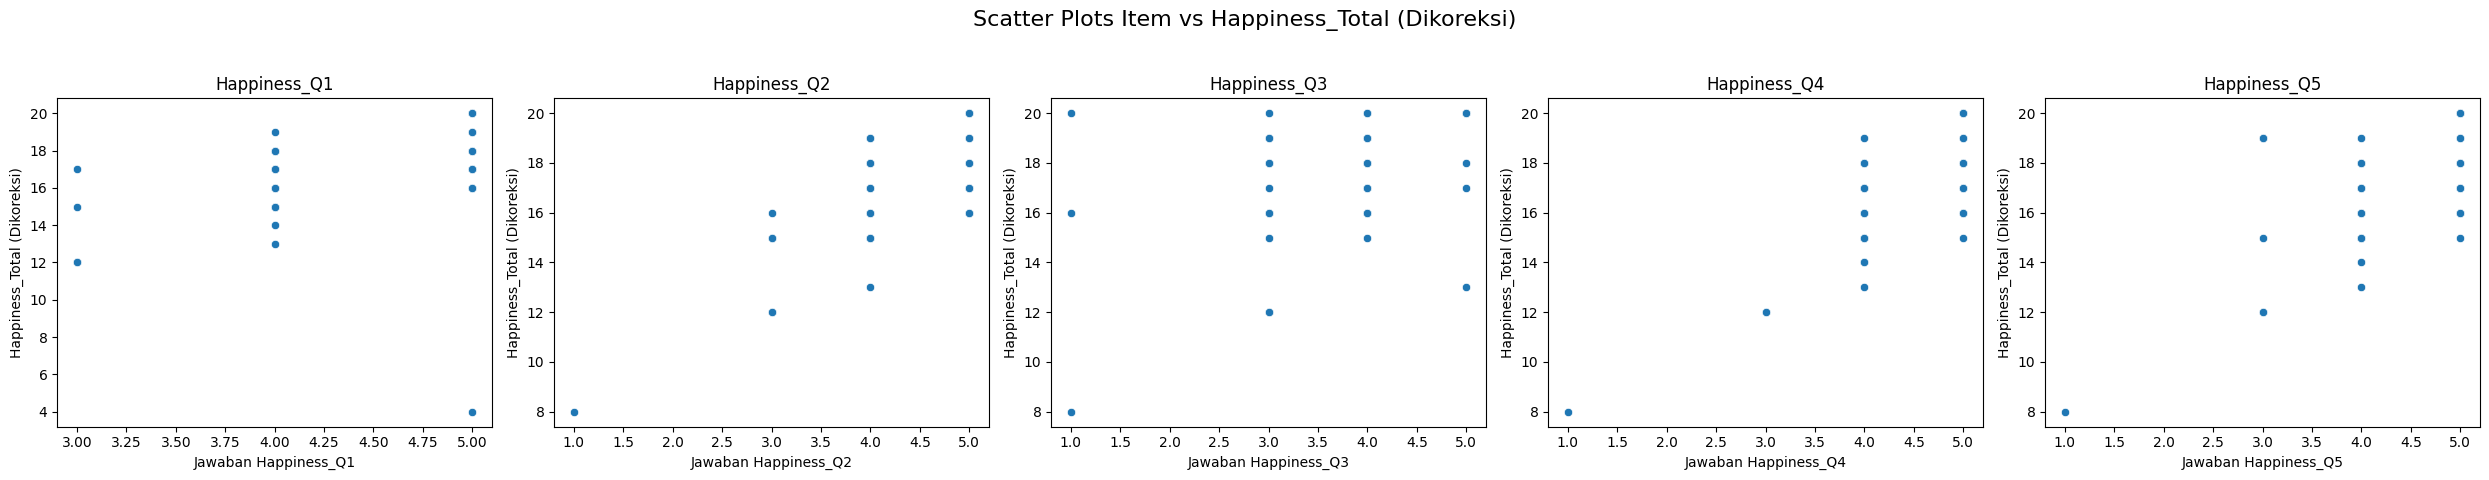

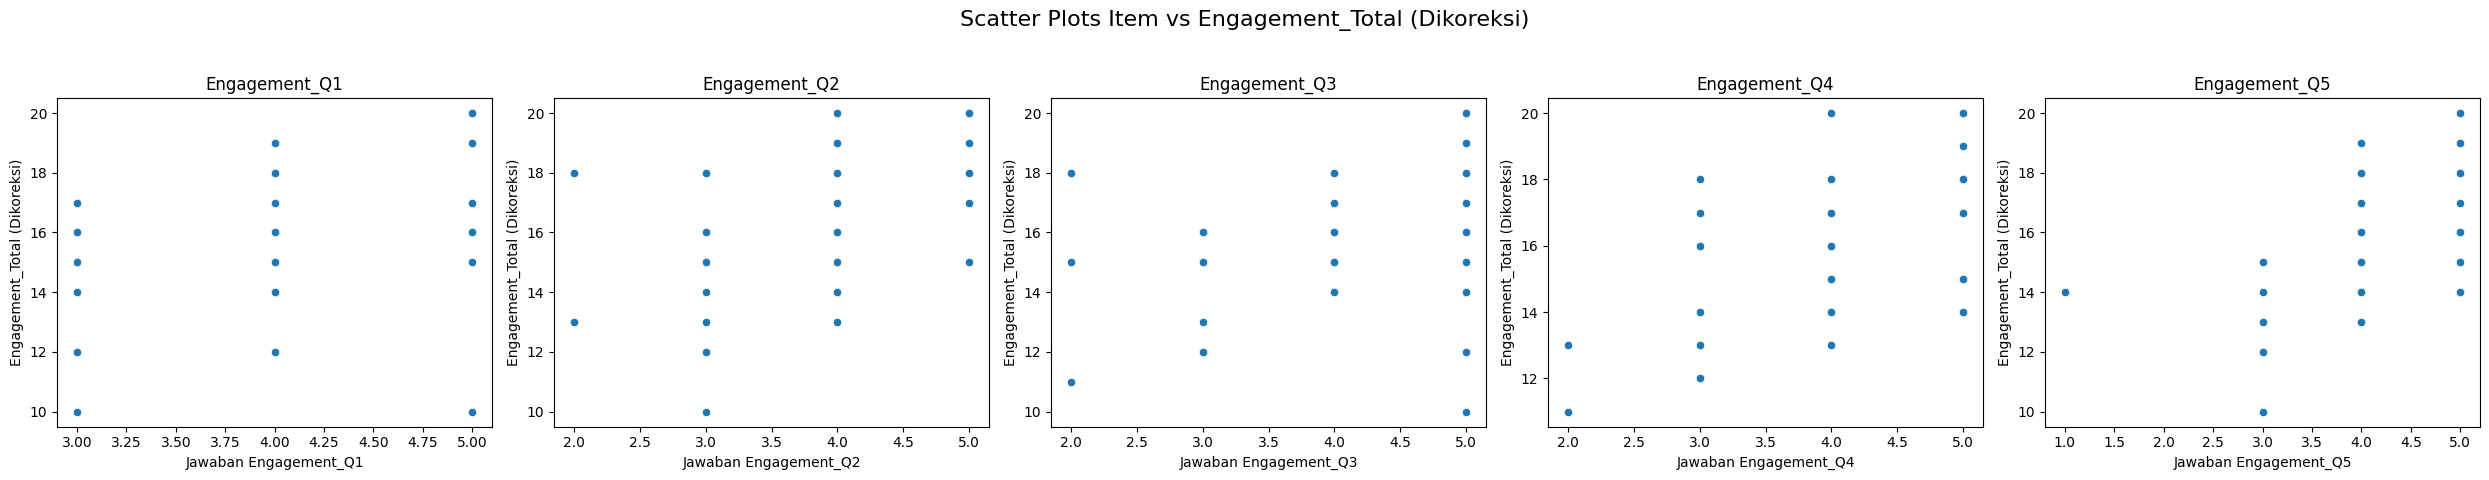

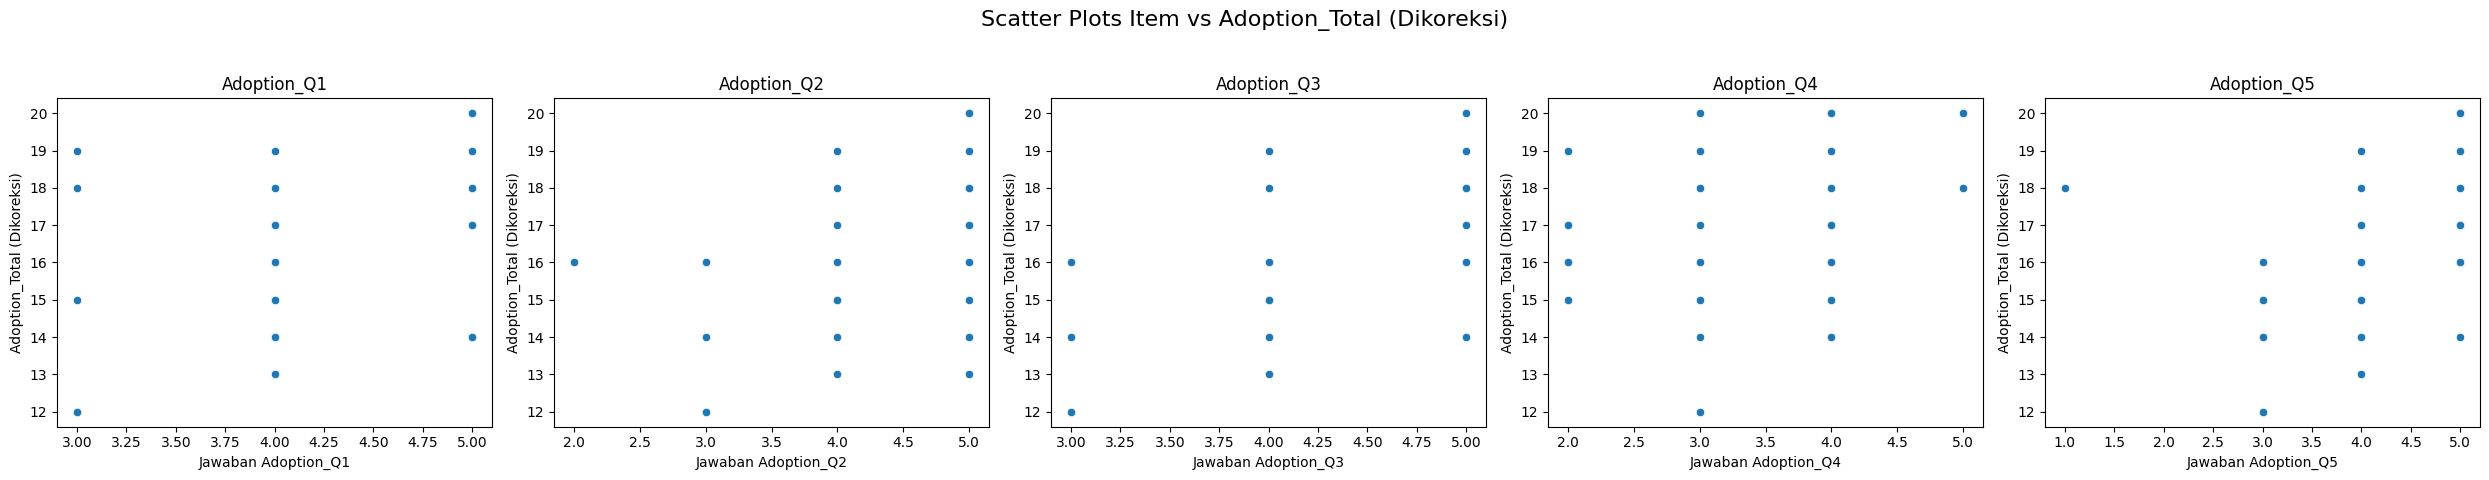

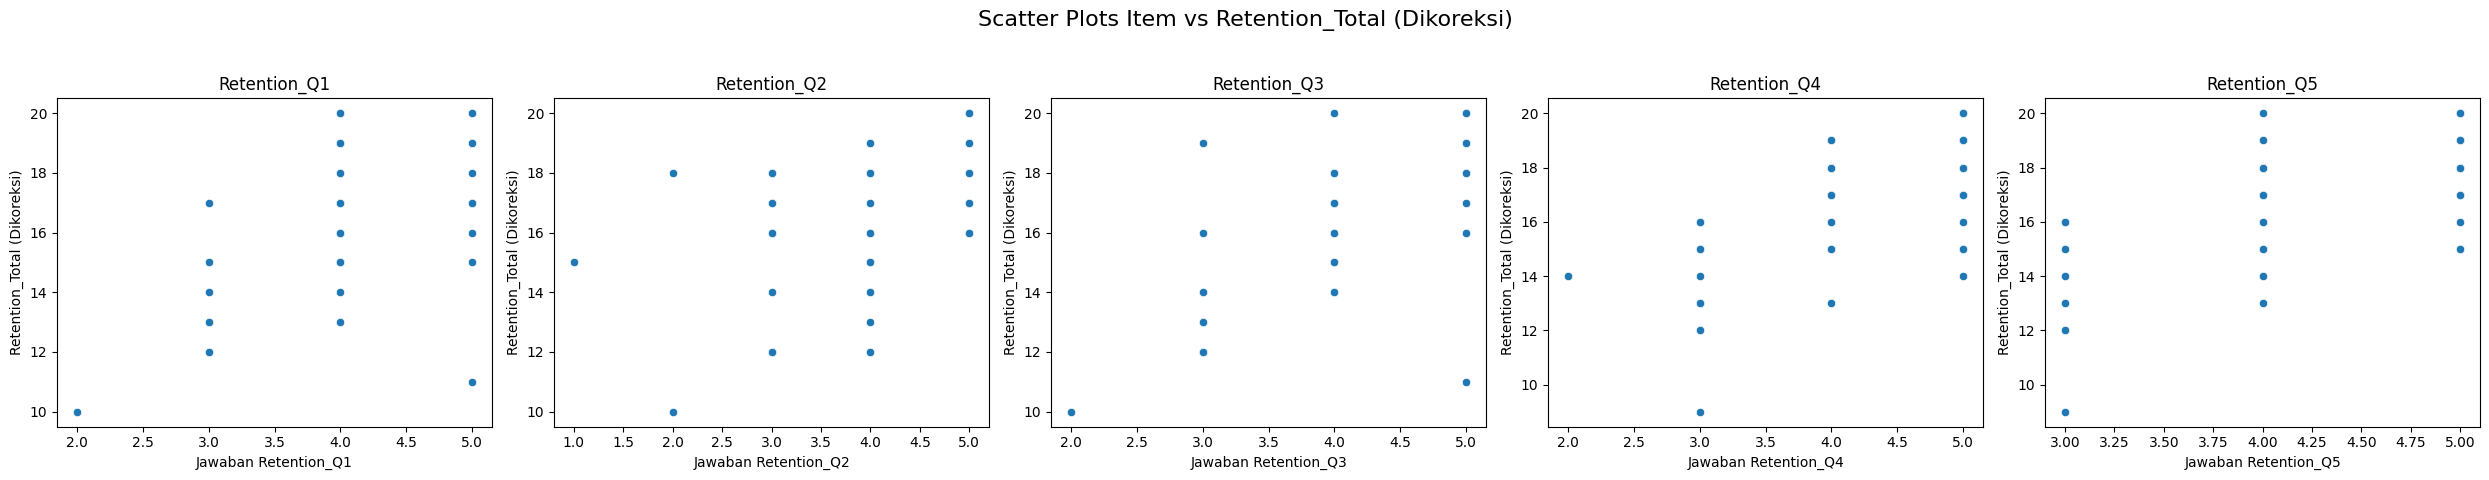

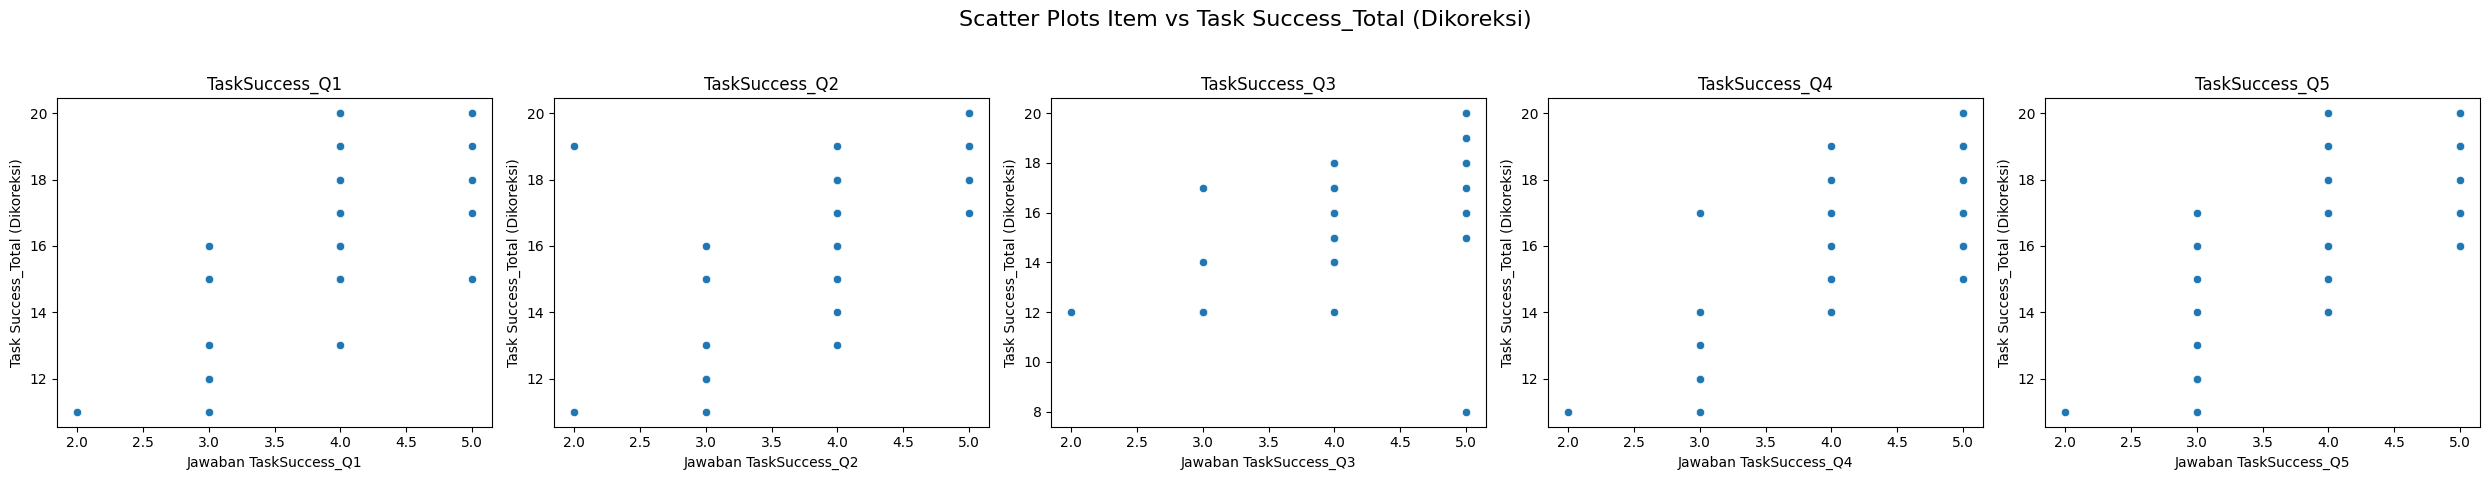

In [ ]:
aspects = ['Happiness', 'Engagement', 'Adoption', 'Retention', 'Task Success']
all_cols = [happiness_cols, engagement_cols, adoption_cols, retention_cols, task_success_cols]

for i, (aspect, cols) in enumerate(zip(aspects, all_cols)):
    num_cols = len(cols)
    fig, axes = plt.subplots(1, num_cols, figsize=(5 * num_cols, 5))
    fig.suptitle(f'Scatter Plots Item vs {aspect}_Total (Dikoreksi)', fontsize=16)

    for j, col in enumerate(cols):
        # Hitung skor total yang dikoreksi (sesuaikan dengan aspek)
        if aspect == 'Happiness':
            total_corrected = data[happiness_cols].drop(columns=[col]).sum(axis=1)
        elif aspect == 'Engagement':
            total_corrected = data[engagement_cols].drop(columns=[col]).sum(axis=1)
        elif aspect == 'Adoption':
            total_corrected = data[adoption_cols].drop(columns=[col]).sum(axis=1)
        elif aspect == 'Retention':
            total_corrected = data[retention_cols].drop(columns=[col]).sum(axis=1)
        elif aspect == 'Task Success':
            total_corrected = data[task_success_cols].drop(columns=[col]).sum(axis=1)

        sns.scatterplot(x=data[col], y=total_corrected, ax=axes[j])
        axes[j].set_title(col)
        axes[j].set_xlabel(f'Jawaban {col}')
        axes[j].set_ylabel(f'{aspect}_Total (Dikoreksi)')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Untuk menyesuaikan judul super
    plt.show()

In [ ]:
file_path = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'
data = pd.read_csv(file_path, encoding='latin-1', sep=';')

print(data.head().to_string())

In [6]:


# Mencoba membaca file dengan delimiter semicolon (;)
df = pd.read_csv(file_path, encoding="latin-1", sep=";")

# Menampilkan beberapa baris pertama untuk melihat struktur data
df.head()



,Timestamp,Email,Nama,NIM,Angkatan,Happiness_Q1,Happiness_Q2,Happiness_Q3,Happiness_Q4,Happiness_Q5,...,TaskSuccess_Q4,TaskSuccess_Q5,Qualitative_Q1,Qualitative_Q2,Qualitative_Q3,Qualitative_Q4,Feedback,Error,Suggestion,File
0,3/26/2025 9:50:09,rafaelmanurung80@gmail.com,Rafael A. C. Manurung,11S21028,2021,5,5,5,5,5,...,5,5,test,test,test,test,test,test,test,NaN
1,3/26/2025 11:44:39,gloriapanjaitan3012@gmail.com,Gloria Panjaitan,11S23030,2023,5,4,4,5,5,...,4,5,Leaderboard,Tidak,Tidak,Lebih seru dan menarik,Sudah di upload,Sudah di upload,Menambahkan animasi sederhana,https://drive.google.com/open?id=1UWwnVxfv8Sn8...
2,3/26/2025 11:45:03,andresaragih932@gmail.com,Andre Christian Saragih,11S23026,2023,5,5,5,5,5,...,5,5,Point\n\nKarena pointnya dapat ditukarkan dan ...,Tidak,Tidak,Gamifikasi meningkatkan kualitas belajar saya,Sangat bagus,Sudah di uppload,Sudah baik,https://drive.google.com/open?id=1yJpmGPuwsZ1A...
3,3/26/2025 11:45:24,firenoobgaming@gmail.com,Josua,11S23033,2023,3,3,5,4,3,...,3,3,Progress bar,Tidak,Tidak ada sejauh ini,Sama aja,Di foto,Banyak,Ada di foto,https://drive.google.com/open?id=1-51jAdyASsbI...
4,3/26/2025 11:46:16,josuaasrgh@gmail.com,Josua Saragih,11S23028,2023,5,5,4,4,4,...,3,4,Leaderboard,tidak,tidak ada,"lebih seru, dan jadi berpacu untuk belajar",aplikasi nya bagus untuk memacu mahasiswa untu...,1. tombol back tidak berfungsi dengan baik\n2....,UI nya lebih menarik lagi,NaN


In [7]:
# Memilih hanya kolom dengan skala Likert (pertanyaan terkait HEART Framework)
likert_columns = df.columns[5:30]  # Mengasumsikan kolom 5-30 berisi skala Likert
df_likert = df[likert_columns].astype(float)

In [8]:
# Menghitung total skor responden
df_likert["Total_Score"] = df_likert.sum(axis=1)

In [9]:
# Uji Validitas: Korelasi Spearman antara setiap item dengan total skor
validity_results = {}
for col in df_likert.columns[:-1]:  # Kecuali "Total_Score"
    corr, p_value = spearmanr(df_likert[col], df_likert["Total_Score"])
    validity_results[col] = (corr, p_value)

In [10]:
# Mengonversi hasil uji validitas ke DataFrame
validity_df = pd.DataFrame.from_dict(validity_results, orient="index", columns=["Spearman Correlation", "p-value"])

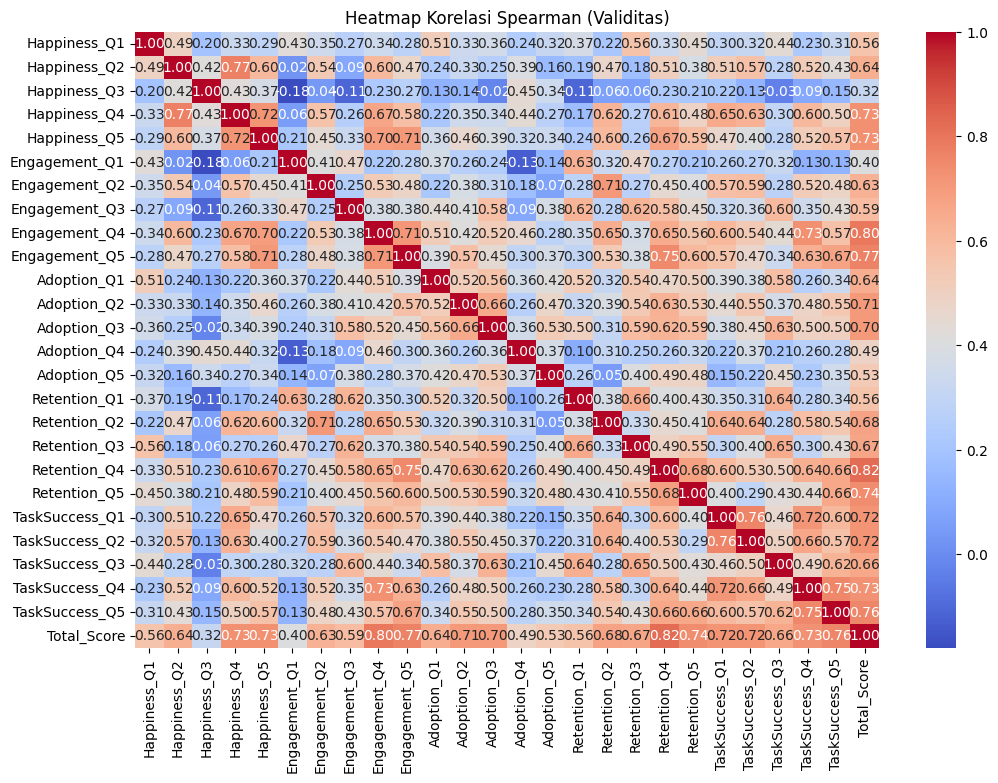

In [11]:
# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df_likert.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Spearman (Validitas)")
plt.show()

In [12]:
# Menampilkan hasil uji validitas
validity_df

,Spearman Correlation,p-value
Happiness_Q1,0.560589,8.541059e-06
Happiness_Q2,0.559748,8.869311e-06
Happiness_Q3,0.280011,3.840190e-02
Happiness_Q4,0.696831,3.441027e-09
Happiness_Q5,0.716278,7.829174e-10
Engagement_Q1,NaN,NaN
Engagement_Q2,0.594412,1.711539e-06
Engagement_Q3,0.655819,5.492368e-08
Engagement_Q4,0.742953,8.317882e-11
Engagement_Q5,0.719351,6.126414e-10


from matplotlib import pyplot as plt
validity_df['Spearman Correlation'].plot(kind='hist', bins=20, title='Spearman Correlation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
validity_df['p-value'].plot(kind='hist', bins=20, title='p-value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
validity_df.plot(kind='scatter', x='Spearman Correlation', y='p-value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
validity_df['Spearman Correlation'].plot(kind='line', figsize=(8, 4), title='Spearman Correlation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
validity_df['p-value'].plot(kind='line', figsize=(8, 4), title='p-value')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-13-e0f9e886a1df>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Cronbach's Alpha"], y=[alpha_value], palette="Blues")


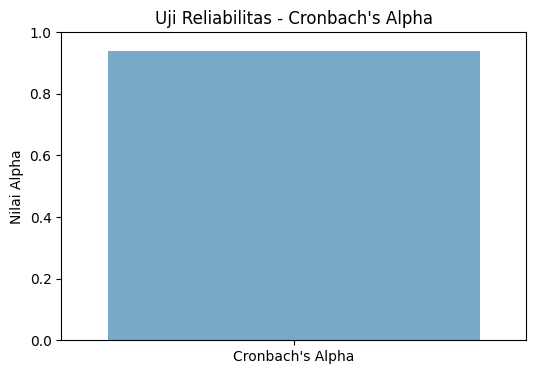

np.float64(0.9408015918160655)

In [13]:
from scipy.stats import ttest_1samp

# Fungsi untuk menghitung Cronbach's Alpha
def cronbach_alpha(df):
    items = df.shape[1]
    variances = df.var(axis=0, ddof=1)
    total_variance = df.sum(axis=1).var(ddof=1)
    alpha = (items / (items - 1)) * (1 - (variances.sum() / total_variance))
    return alpha

# Menghitung Cronbach's Alpha
alpha_value = cronbach_alpha(df_likert.iloc[:, :-1])  # Mengabaikan kolom Total_Score

# Visualisasi reliabilitas
plt.figure(figsize=(6, 4))
sns.barplot(x=["Cronbach's Alpha"], y=[alpha_value], palette="Blues")
plt.ylim(0, 1)
plt.title("Uji Reliabilitas - Cronbach's Alpha")
plt.ylabel("Nilai Alpha")
plt.show()

# Menampilkan hasil
alpha_value
